Justin Slud <br>
PHYS165 <br>
Final Project
 <br>

Introduction: <br>
This project will focus on the terminal velocity of falling objects through air and how factors such as surface area and drag effect the motion. The objects are ones with regular shapes and known drag coefficients:
- penny
- brick
- bird
- human
- hemisphere
- sphere



In [0]:
# tools/Modules I will use
import numpy as np 
# np.std() for standard deviation
# np.random.random() for Monte-Carlo simulation
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# initial Conditions and Constants
g = 9.8 # gravitational acceleration
rho = 1.225 # density of air at normal temperature and pressure
v0 = 0. # initial velocity
tmax = 10.
dt = .1
t = np.arange(0, tmax, dt)

# function to return the index of an array of the first instance a condition is met
def first(cond, arr):
  for i, ele in enumerate(arr):
    if cond(ele):
      return i
  return -1

**Method of calculating terminal velocity**

$$V_{termninal} = (\frac{2mg}{\rho AC})^{1/2}$$ <br>
p = density of air ~ 1.225 kg/m^3 <br>
m = mass <br>
g = accelerating due to gravity = 9.8 m/s^2 <br>
A = projected area of object (perpendicular to direction of movement) <br>
C = drag coefficient <br>

By manipulating the above equation, we also get

$$ F_{drag} = \frac{C\rho v^2A}{2} = m\frac{dv}{dt} $$


**Calculating terminal velocity with python** <br>

Below is a user defined function which calculates the velocity of an object over time. When plotted, the velocity should approach the terminal velocity. 



In [0]:
# first order, returns v
def f(v, t):
  return g - (A * C * rho * v**2 / (2 * m))

In [0]:
# mass in kg, area in m^2
penny = {"name": "Penny", "drag": .47, "mass": .0025, "maxarea": np.pi*(.01905/2)**2, "minarea": .01905*.00152}
sphere = {"name": "Sphere", "drag": .47, "mass": 1, "maxarea": np.pi*1**2, "minarea": np.pi*1**2}
hemisphere = {"name": "Hemisphere", "drag": .42, "mass": 1, "maxarea": np.pi*1**2, "minarea": .5*np.pi*1**2}
brick = {"name": "Brick", "drag": 2.1, "mass": 1.905, "maxarea": .215*.1125, "minarea": .1125*.065}
bird = {"name": "Bird", "drag": .47, "mass": .05, "maxarea": .04, "minarea": .02}
human = {"name": "Human", "drag": 1.2, "mass": 60, "maxarea": .25, "minarea": .1}

objects = [penny, sphere, hemisphere, brick, bird, human]

Estimations for drag coefficients and masses stored in a dictionary.

We can find the desired value (for example, the drag coefficient of a penny) with:

```
penny["drag"]
```



Below is where the calculations and graphing takes place. There is a loop for each object we want to test. On the left there is a plot of the objects' velocities with varied surface area, and on the right we have run trials under ideal conditions and then use a Monte-Carlo simulation to vary the object's mass. 

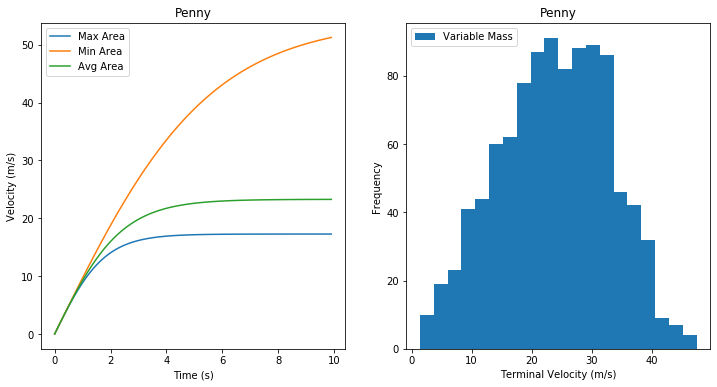

Velocity after 10.0 seconds: 23.2722
Terminal Velocity: 23.2834
Time to reach 99% of terminal velocity (s): 6.300000000000001
Time for velocities to visibly deviate (s): 0.9

Number of trials: 1000
Average terminal velocity (m/s): 23.77
Standard deviation of terminal velocities (m/s): 9.18965



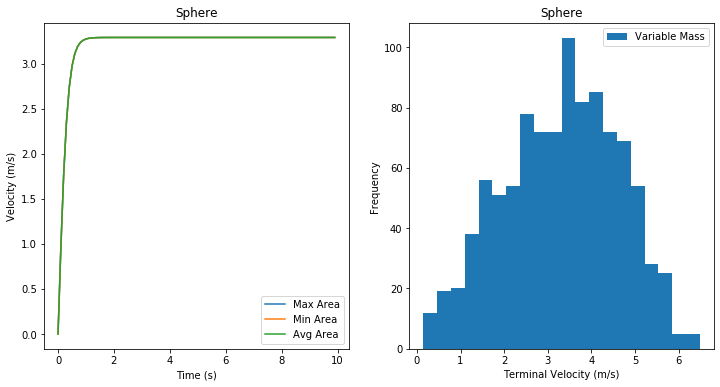

Velocity after 10.0 seconds: 3.29182
Terminal Velocity: 3.29182
Time to reach 99% of terminal velocity (s): 0.9
Time for velocities to visibly deviate (s): N/A

Number of trials: 1000
Average terminal velocity (m/s): 3.30844
Standard deviation of terminal velocities (m/s): 1.31723



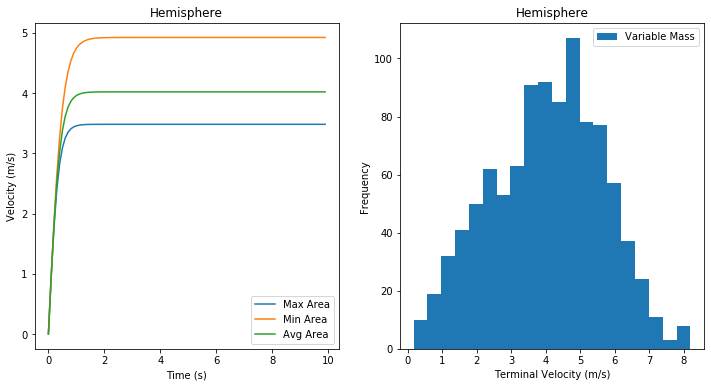

Velocity after 10.0 seconds: 4.02096
Terminal Velocity: 4.02096
Time to reach 99% of terminal velocity (s): 1.1
Time for velocities to visibly deviate (s): 0.5

Number of trials: 1000
Average terminal velocity (m/s): 4.03494
Standard deviation of terminal velocities (m/s): 1.61878



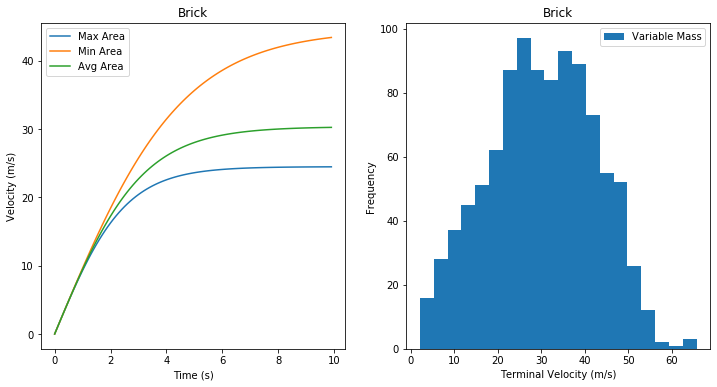

Velocity after 10.0 seconds: 30.2554
Terminal Velocity: 30.3569
Time to reach 99% of terminal velocity (s): 8.200000000000001
Time for velocities to visibly deviate (s): 1.2000000000000002

Number of trials: 1000
Average terminal velocity (m/s): 30.2174
Standard deviation of terminal velocities (m/s): 12.2509



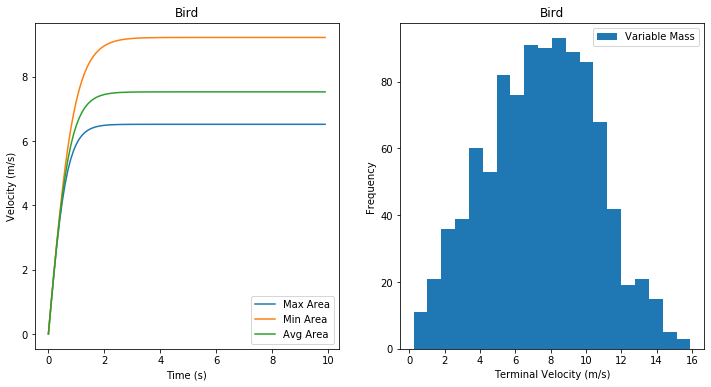

Velocity after 10.0 seconds: 7.53244
Terminal Velocity: 7.53244
Time to reach 99% of terminal velocity (s): 2.1
Time for velocities to visibly deviate (s): 0.6000000000000001

Number of trials: 1000
Average terminal velocity (m/s): 7.47225
Standard deviation of terminal velocities (m/s): 3.06418



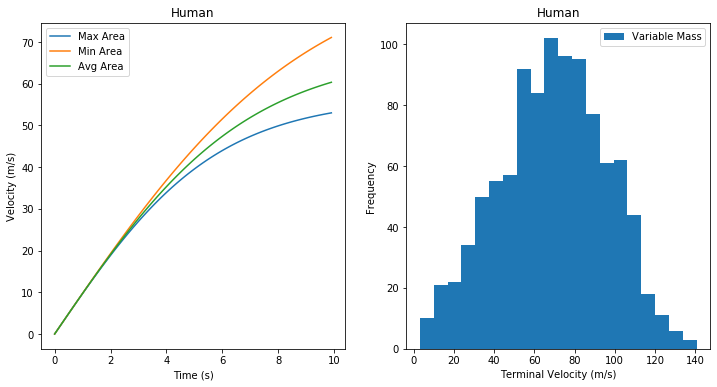

Velocity after 10.0 seconds: 60.3559
Terminal Velocity: 67.6123
Time to reach 99% of terminal velocity (s): N/A
Time for velocities to visibly deviate (s): 2.1

Number of trials: 1000
Average terminal velocity (m/s): 69.2658
Standard deviation of terminal velocities (m/s): 26.7417



In [9]:
trials = 1000

# repeats for each of the 6 test objects
for object in objects:
  plt.figure(figsize=(12,6))
  v0 = 0.
  C = object["drag"]
  m = object["mass"]
  A = object["maxarea"]
  Q1 = odeint(f, v0, t)

  plt.subplot(121)
  plt.xlabel('Time (s)')
  plt.ylabel('Velocity (m/s)')
  plt.title(object["name"])
  plt.plot(t, Q1, label="Max Area")
  A = object["minarea"]
  Q2 = odeint(f, v0, t)
  plt.plot(t, Q2, label="Min Area")
  A = (object["minarea"] + object["maxarea"]) / 2
  vterminal = ((2*m*g)/(rho*A*C))**.5
  Q3 = odeint(f, v0, t)
  plt.plot(t, Q3, label="Avg Area")
  plt.legend()

  # random sample of masses with a normal distribution
  m1 = object["mass"] + m*np.random.randn(trials)
  m1 = abs(m1)
  vterminal1 = ((2*m1*g)/(rho*A*C))**.5

  plt.subplot(122)
  plt.xlabel('Terminal Velocity (m/s)')
  plt.ylabel('Frequency')
  plt.title(object["name"])
  plt.hist(vterminal1, 20, label="Variable Mass")
  plt.legend()
  plt.show()

  # statistics based on the average surface area and calculated velocities
  print("Velocity after {} seconds: {:g}".format(tmax, Q3.flatten()[-1]))
  print("Terminal Velocity: {:g}".format(((2*m*g)/(rho*A*C))**.5))
  print('Time to reach 99% of terminal velocity (s): {}'.format(dt*first(lambda x: x > .99*vterminal, Q3) if first(lambda x: x>= .99*vterminal, Q3
  ) != -1 else "N/A"))
  print('Time for velocities to visibly deviate (s): {}'.format(dt*first(lambda x: x > .5, Q2-Q1) if first(lambda x: x> .5, Q2-Q1
  ) != -1 else "N/A"))
  print('\nNumber of trials: {}'.format(trials))
  print('Average terminal velocity (m/s): {:g}'.format(np.average(vterminal1)))
  print('Standard deviation of terminal velocities (m/s): {:g}\n'.format(np.std(vterminal1)))


Conclusions: <br>
Although part of this experiment was random, the results tend towards certain trends between runs.

An interesting statistic to take was the time at which the objects motions deviated compared based on effective surface area. Since dv/dt has an inverse relationship with surface area, minarea was always above average area was always above max area. The penny, brick, bird, and hemisphere all deviated within roughly the first second, which is likely due to the large change in surface area as they are not regularly shaped like a sphere which exhibits no deviation. For the sphere, changing the orientation has no effect on the effective surface area, meaning the terminal velocity and drag will remain unchaged, which is why the two curves are identical.

The hemisphere and bird practically reached the calculated terminal velocity within the given time, while the brick and penny were still over 95% of the way there. Meanwhile, the human at max area, was far from reaching terminal velocity after 10.0 seconds.

Looking at the plots on the left, some of the curves had a sharp turn such as bird and sphere while others were more convex such and penny and human. One likely reason for this is that drag coefficient which is generally lower (less than .5) for the objects exhibiting a sharp turn in velocity, and higher for smoother accelerations.

The plots on the right are important because they show many trials and how likely the terminal velocities we previously calculated is to occur. The curve should be centered around the average-surface-area terminal velocity, but in the penny, the highest frequencies were around 80 m/s while for the others it was closer to 100 m/s, which could be experimental error, random, or the penny's small mass which will largely affect the terminal velocity with a small change in mass. 

Sources: <br>
https://www.engineeringtoolbox.com/drag-coefficient-d_627.html <br>
https://physics.info/drag/ <br>
https://en.wikipedia.org/wiki/Drag_coefficient <br>
https://www.grc.nasa.gov/WWW/K-12/airplane/termv.html <br>



